In [1]:
# 2.1

#First let's set up our packages
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

# And set some constants
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
cH0mpc = c/H0kmsmpc   # c/H0 in Mpc  (the km/s cancel out in the numerator and denominator)
cH0Glyr = cH0mpc * 3.262 / 1000 #c/H0 in billions of light years.  There are 3.262 light year / parsec

In [2]:
# Write a function for the integrand, i.e. $1/E(z)$,
def Ezinv(z, om, ol):
    ok = 1.0-om-ol
    Ez = np.sqrt(0.0) # Put your code here!  This is not right until you change it.
    return 1.0/Ez

# Choose the redshift (e.g. z=0.3)
z=0.3

# Choose a cosmology
om, ol = 0.3, 0.7

# Calcuate the integral (just the int_0^z(dz/E(z)) part, which givers xx=R0*X/(c/H_0)):
xx = integrate.quad(Ezinv,0,z,args=(om,ol))[0] 

# Sub in the required constants to get the comoving distance R_0*X
R0X = xx*cH0Glyr # Distance in Glyr

print('Comoving distance to a galaxy at z=%.3f is %.2f Glyr (this is not right until you have put the correct equation for Ez above)'%(z,R0X))

Comoving distance to a galaxy at z=0.300 is nan Glyr (this is not right until you have put the correct equation for Ez above)


C:\Users\april\AppData\Local\Temp\ipykernel_16052\4262277860.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return 1.0/Ez
C:\Users\april\AppData\Local\Temp\ipykernel_16052\4262277860.py:14: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  xx = integrate.quad(Ezinv,0,z,args=(om,ol))[0]


In [3]:
#2.2
# Given redshift
z = 0.3

# Cosmology parameters
om, ol = 0.3, 0.7

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Calculate the comoving distance at z=0.3
xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
R0X = xx * cH0Glyr

# Calculate the scale factor at different times
a_half_size = 0.5
a_at_emission = 1 / (1 + z)

# Calculate distances at different times
distance_half_size = a_half_size * R0X
distance_at_emission = a_at_emission * R0X

# Print the results
print('Distance to a galaxy at z=%.3f when a=0.5 is %.2f Glyr' % (z, distance_half_size))
print('Distance to a galaxy at z=%.3f when the light we see was emitted is %.2f Glyr' % (z, distance_at_emission))

Distance to a galaxy at z=0.300 when a=0.5 is 1.95 Glyr
Distance to a galaxy at z=0.300 when the light we see was emitted is 3.00 Glyr


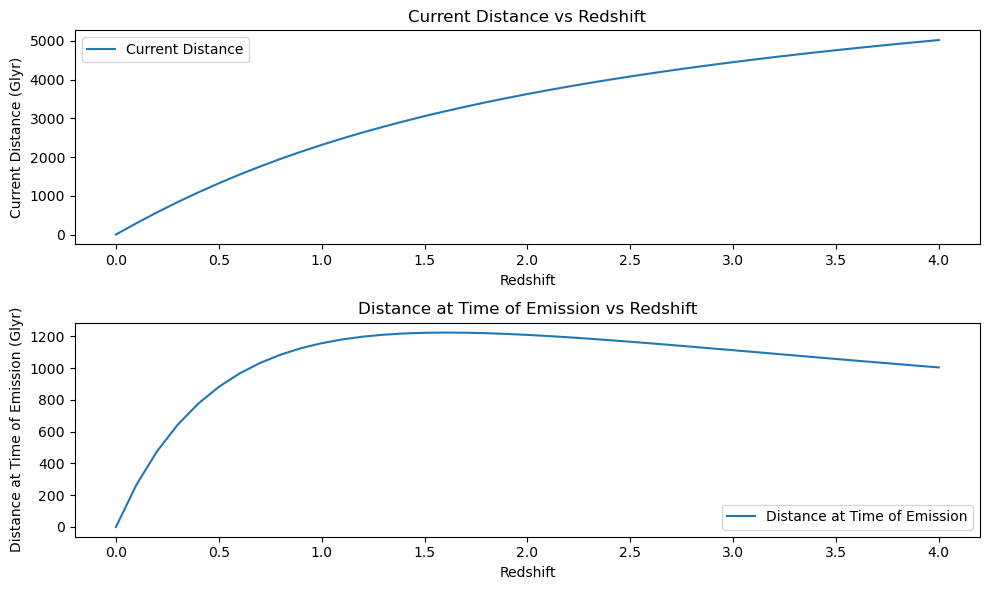

In [4]:
#2.3
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Cosmology parameters
om, ol = 0.3, 0.7

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        xarr[i] = xx * cH0Glyr
    return xarr

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1
zarr = np.arange(zstart, zstop, zstep)

# Calculate distances at different redshifts for current distance and distance at time of emission
current_distance = calculate_distances(zarr, om, ol)
a_at_emission = 1 / (1 + zarr)
distance_at_emission = current_distance * a_at_emission

# Plotting
plt.figure(figsize=(10, 6))

# Plot current distance vs redshift
plt.subplot(2, 1, 1)
plt.plot(zarr, current_distance, label='Current Distance')
plt.xlabel('Redshift')
plt.ylabel('Current Distance (Glyr)')
plt.title('Current Distance vs Redshift')
plt.legend()

# Plot distance at time of emission vs redshift
plt.subplot(2, 1, 2)
plt.plot(zarr, distance_at_emission, label='Distance at Time of Emission')
plt.xlabel('Redshift')
plt.ylabel('Distance at Time of Emission (Glyr)')
plt.title('Distance at Time of Emission vs Redshift')
plt.legend()

plt.tight_layout()
plt.show()

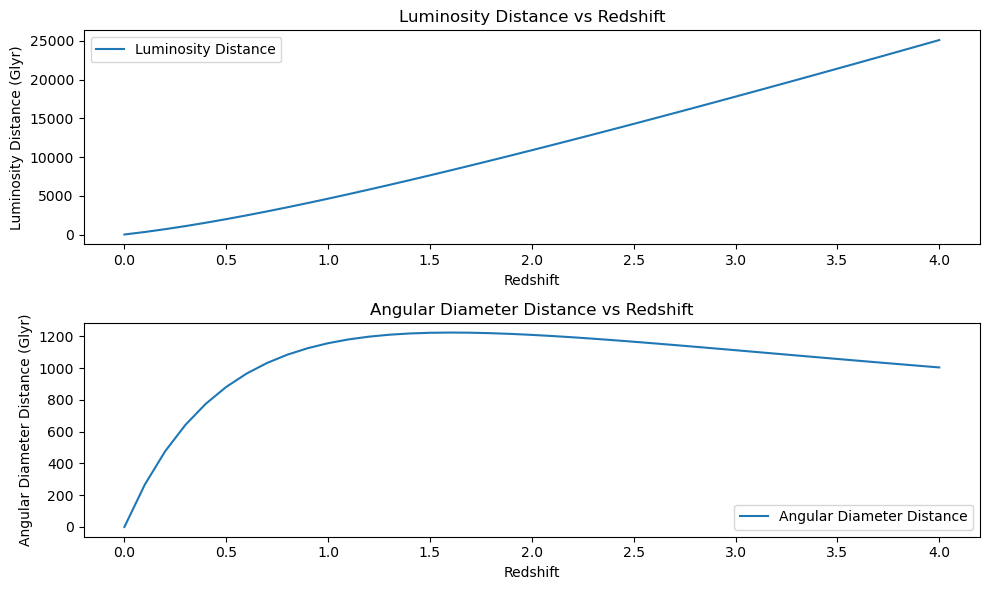

In [5]:
#2.4
# Constants
cH0Glyr = 299792.458 / 100   # Speed of light in km/s divided by Hubble constant in km/s/Mpc, to get Glyr

# Cosmology parameters
om, ol = 0.3, 0.7
ok = 1.0 - om - ol

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Function to correct comoving distance for curvature
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        dk = Sk(xx, ok)
        xarr[i] = xx * cH0Glyr
    return xarr

# Start by making an array of redshifts
zstart = 0.0
zstop = 4.1
zstep = 0.1
zarr = np.arange(zstart, zstop, zstep)

# Calculate comoving distances at different redshifts
current_distance = calculate_distances(zarr, om, ol)

# Calculate luminosity distance and angular diameter distance
DL = current_distance * (1 + zarr)
DA = current_distance / (1 + zarr)

# Plotting
plt.figure(figsize=(10, 6))

# Plot luminosity distance vs redshift
plt.subplot(2, 1, 1)
plt.plot(zarr, DL, label='Luminosity Distance')
plt.xlabel('Redshift')
plt.ylabel('Luminosity Distance (Glyr)')
plt.title('Luminosity Distance vs Redshift')
plt.legend()

# Plot angular diameter distance vs redshift
plt.subplot(2, 1, 2)
plt.plot(zarr, DA, label='Angular Diameter Distance')
plt.xlabel('Redshift')
plt.ylabel('Angular Diameter Distance (Glyr)')
plt.title('Angular Diameter Distance vs Redshift')
plt.legend()

plt.tight_layout()
plt.show()

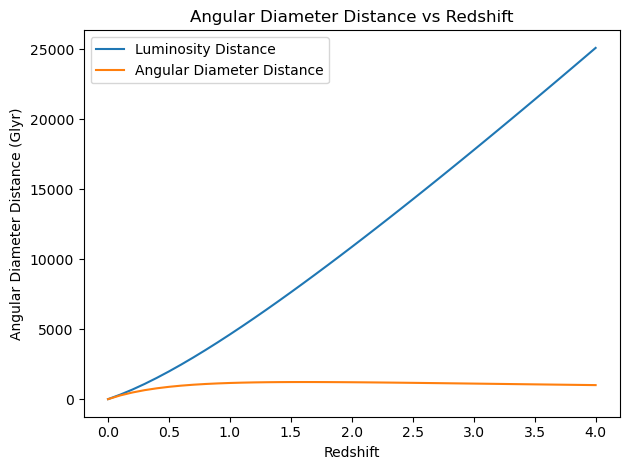

In [6]:
#plot both
plt.plot(zarr, DL, label='Luminosity Distance')
plt.plot(zarr, DA, label='Angular Diameter Distance')
plt.xlabel('Redshift')
plt.ylabel('Angular Diameter Distance (Glyr)')
plt.title('Angular Diameter Distance vs Redshift')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
#Fit data for multiple types of universe

C:\Users\april\AppData\Local\Temp\ipykernel_16052\3908491302.py:9: RuntimeWarning: invalid value encountered in sqrt
  Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
C:\Users\april\AppData\Local\Temp\ipykernel_16052\3908491302.py:27: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]


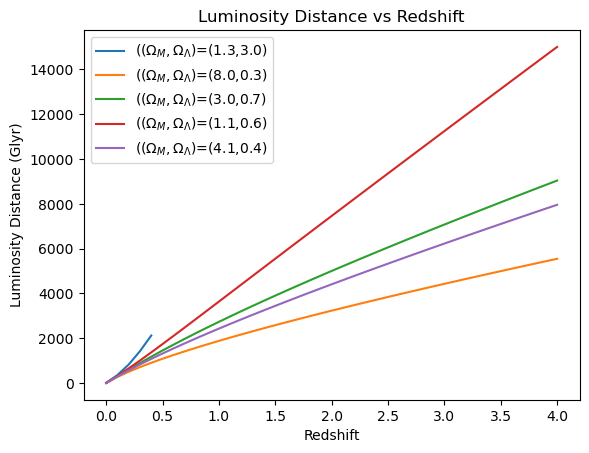

In [10]:
#Better defined graph
#Paremeters for each universe
omarr = [1.3, 8.0, 3.0, 1.1, 4.1];
olarr = [3.0, 0.3, 0.7, 0.6, 0.37];

# Function for the integrand, 1/E(z)
def Ezinv(z, om, ol):
    ok = 1.0 - om - ol
    Ez = np.sqrt(om*(1+z)**3 + ok*(1+z)**2 + ol)
    return 1.0/Ez

# Function to correct comoving distance for curvature
def Sk(xx, ok):
    if ok < 0.0:
        dk = np.sin(np.sqrt(-ok)*xx)/np.sqrt(-ok)
    elif ok > 0.0:
        dk = np.sinh(np.sqrt(ok)*xx)/np.sqrt(ok)
    else:
        dk = xx
    return dk

# Calculate comoving distance at different redshifts
def calculate_distances(zarr, om, ol):
    xarr = np.zeros(len(zarr))
    ok = 1.0 - om -ol
    for i, z in enumerate(zarr):
        xx = integrate.quad(Ezinv, 0, z, args=(om, ol))[0]
        dk = Sk(xx, ok)
        xarr[i] = xx
    return xarr

for j, om in enumerate(omarr):
    ok = 1.0 - omarr[j] - olarr[j]
    current_distance = calculate_distances(zarr, omarr[j], olarr[j])
 # Calculate luminosity distance
    DL = Sk(current_distance,ok)*(1+zarr)*cH0Glyr
    plt.plot(zarr, DL, label = '(($\\Omega_M,\\Omega_\\Lambda$)=(%.1f,%.1f)'%(omarr[j],olarr[j]))
    plt.xlabel('Redshift')
    plt.ylabel('Luminosity Distance (Glyr)')
    plt.title('Luminosity Distance vs Redshift')
    plt.legend()